In [12]:
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt

In [2]:
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [3]:
from scipy.spatial.distance import pdist,squareform # pdist - distance matrix squareform-symmetrical matrix

In [5]:
row_dist = pd.DataFrame(
    squareform(
        pdist(df.values, metric='euclidean')
    ),
    columns=labels,
    index=labels
)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [6]:
from scipy.cluster.hierarchy import linkage

In [7]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [8]:
row_clusters = linkage(pdist(
    df,metric='euclidean'
),
    method='complete')

In [10]:
pd.DataFrame(
    row_clusters,
    columns=['row_label1','row_label2','distance','no. of items in clust'],
    index=['cluster_%d' % (i+1) for i in range(row_clusters.shape[0])]
)

,row_label1,row_label2,distance,no. of items in clust
cluster_1,0.0,4.0,3.835396,2.0
cluster_2,1.0,2.0,4.347073,2.0
cluster_3,3.0,5.0,5.899885,3.0
cluster_4,6.0,7.0,8.316594,5.0


In [11]:
from scipy.cluster.hierarchy import dendrogram

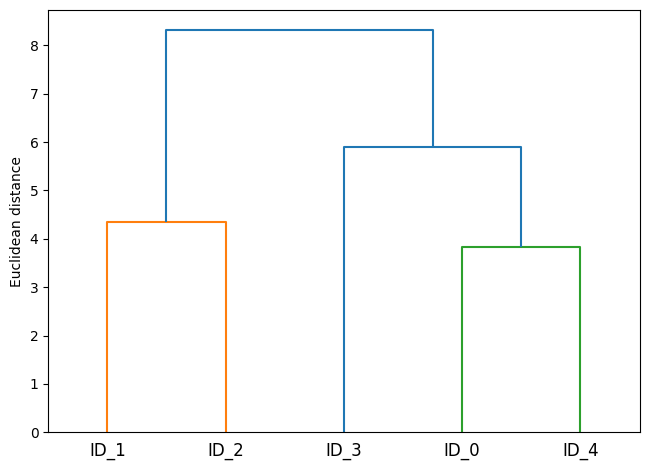

In [13]:
row_dendr = dendrogram(
    row_clusters,
    labels=labels,
    # orientation='left'
)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_23199/882816872.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels(['']+ list(df_rowclust.columns))
/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_23199/882816872.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels(['']+ list(df_rowclust.index)


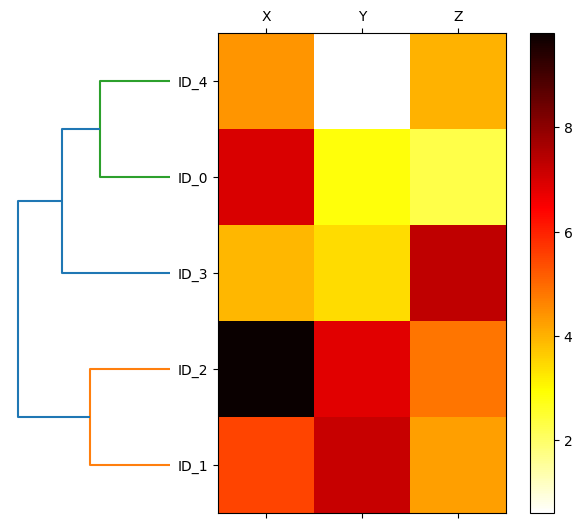

In [16]:
fig = plt.figure(figsize=(8,8),facecolor='white')
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(
    row_clusters,
    orientation='left'
)
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust,
                  interpolation='nearest',
                  cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels(['']+ list(df_rowclust.columns))
axm.set_yticklabels(['']+ list(df_rowclust.index)
)
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
ac = AgglomerativeClustering(
    n_clusters=3,
    # affinity='euclidean',
    linkage='complete'
)
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


In [20]:
ac = AgglomerativeClustering(
    n_clusters=2,
    # affinity='euclidean',
    linkage='complete'
)
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [0 1 1 0 0]
